In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

#import warnings
#warnings.filterwarnings("ignore")

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# Problem 1

In [2]:
## Part A/B

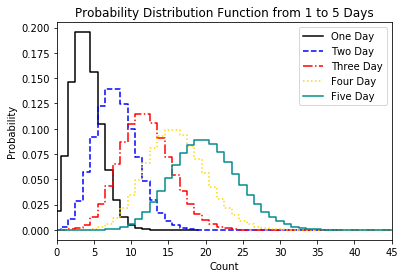

In [3]:
dist = poisson(4)

x = np.arange(0, 20)
oneDayPMF = dist.pmf(x)
oneDayPlot = plt.plot(x, oneDayPMF, color='black',
                      drawstyle='steps-mid',
                      label='One Day')
#Two Days
twoDayPMF = np.convolve(oneDayPMF, oneDayPMF)
x = np.arange(0,39)
twoDayPlot = plt.plot(x, twoDayPMF, color='blue',
                      drawstyle='steps-mid',
                      linestyle='--',
                      label='Two Day')
#Three Days
threeDayPMF = np.convolve(twoDayPMF, oneDayPMF)
x = np.arange(0,58)
threeDayPlot = plt.plot(x, threeDayPMF, color='red',
                        drawstyle='steps-mid',
                        linestyle='-.',
                        label='Three Day')
#Four Days
fourDayPMF = np.convolve(threeDayPMF, oneDayPMF)
x = np.arange(0,77)
fourDayPlot = plt.plot(x, fourDayPMF, color='gold',
                       drawstyle='steps-mid',
                       linestyle=':',
                       label='Four Day')
#Five Days
fiveDayPMF = np.convolve(fourDayPMF, oneDayPMF)
x = np.arange(0,96)
fiveDayPlot = plt.plot(x, fiveDayPMF, color='darkcyan',
                      drawstyle='steps-mid',
                      linestyle='-',
                      label='Five Day')

plt.xlim(0,45)
plt.title('Probability Distribution Function from 1 to 5 Days')
plt.xlabel('Count')
plt.ylabel('Probability')
plt.legend(loc='upper right')

From the above plot, we can see how if we convolve the Poisson distribution over several days, the distribution becomes shorter and wider, and the peak moves further to the right. Additionally we can also tell that the distribution becomes more symmetrical, since the height of the steps on both sides become more even.

After summing the probability distribution over 5 days, we see that the distribution is still Poisson. Since Poisson distributions deal with discrete measurements, it makes sense that when we add the distributions together, we still see the seperate "bins" (represented by the steps on the plot).

### Part C

(250, 600)

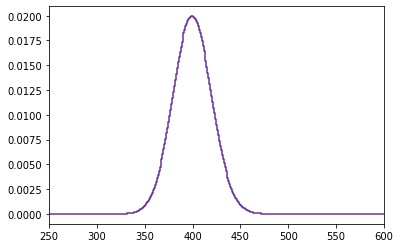

In [4]:
oneHunnedDayPMF = oneDayPMF
for x in range(99):
    oneHunnedDayPMF = np.convolve(oneHunnedDayPMF, oneDayPMF)
x = np.arange(0,len(oneHunnedDayPMF))
oneHunnedDayPlot = plt.plot(x, oneHunnedDayPMF, color='rebeccapurple',
                      drawstyle='steps-mid',
                      linestyle='-')
plt.xlim(250,600)

(650, 1000)

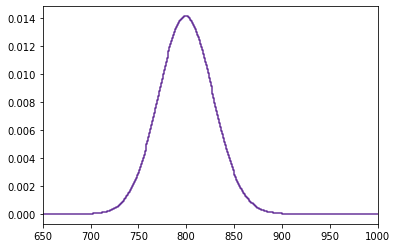

In [5]:
twoHunnedDayPMF = oneHunnedDayPMF
for x in range(100):
    twoHunnedDayPMF = np.convolve(twoHunnedDayPMF, oneDayPMF)
x = np.arange(0,len(twoHunnedDayPMF))
oneHunnedDayPlot = plt.plot(x, twoHunnedDayPMF, color='rebeccapurple',
                      drawstyle='steps-mid',
                      linestyle='-')
plt.xlim(650,1000)

From the two graphs above, we can see that as we keep summing the Poisson distribution, it eventually becomes a Gaussian distribution. The shape of the plot becomes more and more symmetrical. The graphs support the central limit theorem, which states that when most distributions are summed or averaged over enough trials, it will converge to become a Gaussion probability distribution function. From looking at the distribution over 5 days, we can already tell that it is converging to become more Gaussian.

### Part D

# Problem 2

## Part A

(0, 8)

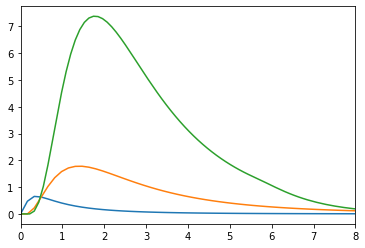

In [6]:
x=np.linspace(0,8)
oneDist = stats.lognorm.pdf(x,1,loc=0,scale=1)
oneLogNormPlot = plt.plot(x, oneDist)

twoDist = np.convolve(oneDist, oneDist)
x=np.linspace(0,16,len(twoDist))
twoLogNormPlot = plt.plot(x, twoDist)

threeDist = np.convolve(twoDist, oneDist)
x=np.linspace(0,16,len(threeDist))
threeLogNormPlot = plt.plot(x, threeDist)
plt.xlim(0,8)

For a skewed continuous distribution, such as a lognormal distribution, we can see that as we average over more observing intervals, the peak moves higher up and moves over to the right more, and the area under the distribution increases as well.

(0, 8)

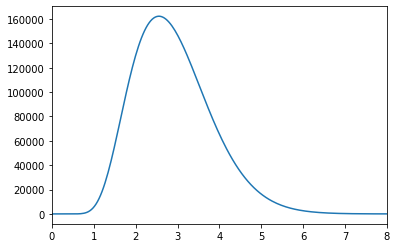

In [12]:
tenDist = twoDist
for x in range(7):
    tenDist = np.convolve(tenDist, oneDist)
x=np.linspace(0,16,len(tenDist))
tenLogNormPlot = plt.plot(x, tenDist)
plt.xlim(0,8)

(0, 8)

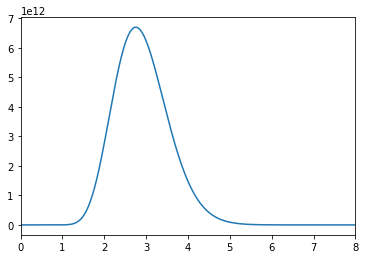

In [8]:
twentyDist = tenDist
for x in range(10):
    twentyDist = np.convolve(twentyDist, oneDist)
x=np.linspace(0,16,len(twentyDist))
twentyLogNormPlot = plt.plot(x, twentyDist)
plt.xlim(0,8)

(0, 8)

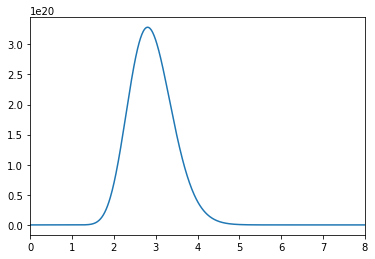

In [9]:
thirtyDist = twentyDist
for x in range(10):
    twentyDist = np.convolve(twentyDist, oneDist)
x=np.linspace(0,16,len(twentyDist))
twentyLogNormPlot = plt.plot(x, twentyDist)
plt.xlim(0,8)

If we keep averaging the distribution, it converges to a Gaussian distribution.
Over 10 intervals, we see that the distribution starts to look symmetrical, however still visibly skewed. Once we get to the average over 30 intervals, the distribution looks Gaussian.

# Problem 3

## Version 1:
We wil have the width of the background Gaussian distribution to be X = 2. Lets assume that we see a signal strength of Y = 3.9

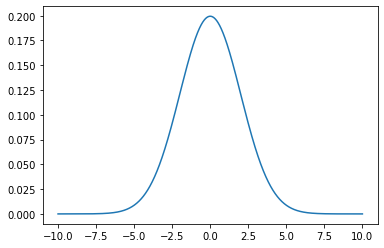

In [10]:
#Part A
dist = norm(0,scale=2)
x = np.linspace(-10,10,100000)
gauss = dist.pdf(x)
backDist = plt.plot(x,gauss)

In [11]:
cdf = stats.norm.cdf(4.2, loc=0, scale=2)
sigma = stats.norm.ppf(cdf, loc=0, scale=2)
print(cdf)
print(sigma)

0.9821355794371834
4.199999999999999


This comes out to a sigma of 4.20, which is less than 5, so we cannot count a measurement of 3.9 to be a signal from the source. Traditionally, we would like to see a sigma of at least 5 to claim a signal as discovery.

## Version 2: